[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/LorenzoRimella/TF_intro/blob/main/image_tensorflow.ipynb)

# Riconoscimento immagini

Iniziamo con l'importare le librerie principali.

In [38]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

from IPython.display import clear_output

import numpy as np

import time

import matplotlib.pyplot as plt

## Carica MNIST

In [39]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Riuscite a riconcoscere 10 numeri abbastanza velocemente?

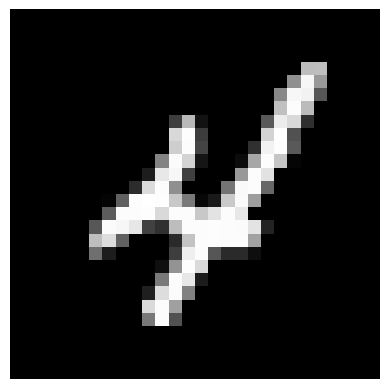

In [44]:
for i in range(10):
    clear_output(wait=True)

    plt.figure()
    plt.imshow(x_train[i, ..., 0], cmap="gray")
    plt.axis("off")
    plt.show(block=False)
    plt.pause(3)
    plt.close()

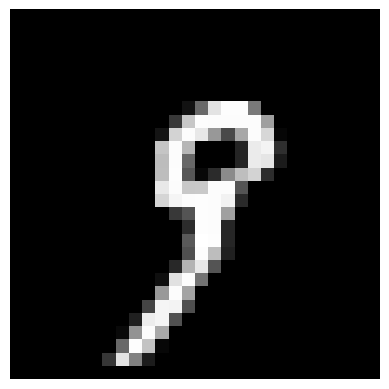

In [41]:
for i in range(10, 20):
    clear_output(wait=True)

    plt.figure()
    plt.imshow(x_train[i, ..., 0], cmap="gray")
    plt.axis("off")
    plt.show(block=False)
    plt.pause(1)
    plt.close()

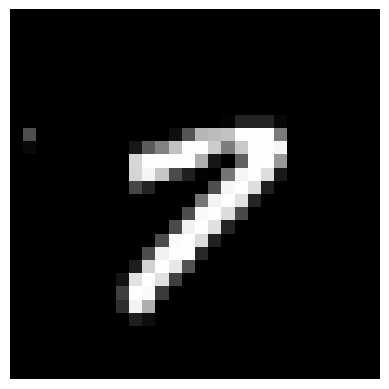

In [42]:
for i in range(20, 30):
    clear_output(wait=True)

    plt.figure()
    plt.imshow(x_train[i, ..., 0], cmap="gray")
    plt.axis("off")
    plt.show(block=False)
    plt.pause(0.3)
    plt.close()

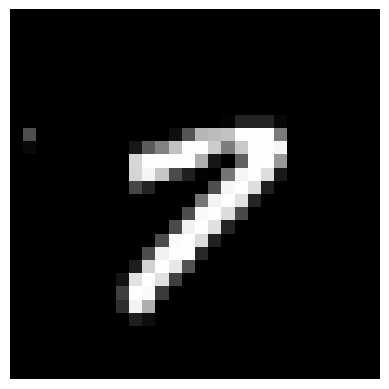

In [43]:
for i in range(20, 30):
    clear_output(wait=True)

    plt.figure()
    plt.imshow(x_train[i, ..., 0], cmap="gray")
    plt.axis("off")
    plt.show(block=False)
    plt.pause(0.05)
    plt.close()

## Convolutional Neural Network

Creiamo il modello

In [20]:
model = models.Sequential([
layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
layers.Conv2D(64, (3,3), activation='relu'),
layers.MaxPooling2D(pool_size=(2,2)),
layers.Dropout(0.25),
layers.Flatten(),
layers.Dense(128, activation='relu'),
layers.Dropout(0.5),
layers.Dense(10, activation='softmax')
])

Alleniamo il modello

In [21]:
model.compile(optimizer='adam',
loss='categorical_crossentropy',
metrics=['accuracy'])

model.fit(x_train, y_train,
batch_size=128,
epochs=10,
validation_data=(x_test, y_test))

Epoch 1/10


2026-01-30 08:47:12.937253: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout_2/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2026-01-30 08:47:13.100150: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8907
2026-01-30 08:47:13.343983: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2026-01-30 08:47:14.045890: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2026-01-30 08:47:14.903604: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x78ce4403e350 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2026-01-30 08:47:14.903650: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 Laptop

469/469 [==============================] - 8s 9ms/step - loss: 0.2409 - accuracy: 0.9262 - val_loss: 0.0559 - val_accuracy: 0.9817
Epoch 2/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0870 - accuracy: 0.9735 - val_loss: 0.0394 - val_accuracy: 0.9864
Epoch 3/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0656 - accuracy: 0.9800 - val_loss: 0.0331 - val_accuracy: 0.9890
Epoch 4/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0527 - accuracy: 0.9840 - val_loss: 0.0286 - val_accuracy: 0.9894
Epoch 5/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0452 - accuracy: 0.9858 - val_loss: 0.0345 - val_accuracy: 0.9881
Epoch 6/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0413 - accuracy: 0.9870 - val_loss: 0.0269 - val_accuracy: 0.9912
Epoch 7/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0354 - accuracy: 0.9892 - val_loss: 0.0257 - val_accuracy: 0.9922
Epoch 8/10
469/46

Riesce a predirre abbastanza velocemente? (La risposta è no se vediamo un lag da un immagine all'altra)

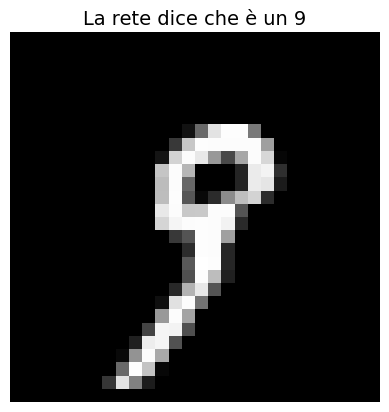

In [35]:
for i in range(10, 20):
    clear_output(wait=True)

    plt.figure()
    plt.imshow(x_train[i, ..., 0], cmap="gray")

    pred = np.argmax(model.predict(x_train[i:i+1, ..., :], verbose=0), axis=1)[0]
    plt.title(f"La rete dice che è un {pred}", fontsize=14)

    plt.axis("off")
    plt.show(block=False)
    plt.pause(1)
    plt.close()

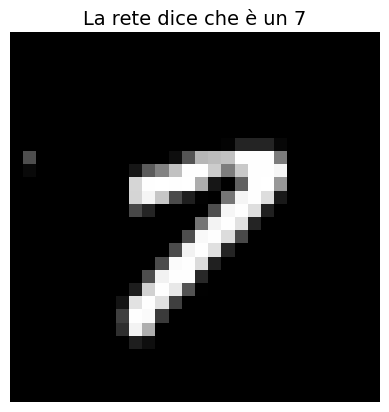

In [37]:
for i in range(20, 30):
    clear_output(wait=True)

    plt.figure()
    plt.imshow(x_train[i, ..., 0], cmap="gray")

    pred = np.argmax(model.predict(x_train[i:i+1, ..., :], verbose=0), axis=1)[0]
    plt.title(f"La rete dice che è un {pred}", fontsize=14)

    plt.axis("off")
    plt.show(block=False)
    plt.pause(0.03)
    plt.close()

## ImageNet

Usiamo dei modelli preallenati sul dataset ImageNet, iniziamo con lo scaricarli. 

In [92]:
from tensorflow.keras.applications import resnet50, efficientnet_v2
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.preprocessing import image

from IPython.display import Image, display

# Load the pre-trained ResNet50 model
model_resnet = resnet50.ResNet50(weights='imagenet')
model_effnet = efficientnet_v2.EfficientNetV2B0(weights='imagenet')

Carichiamo un immagine a piacere 

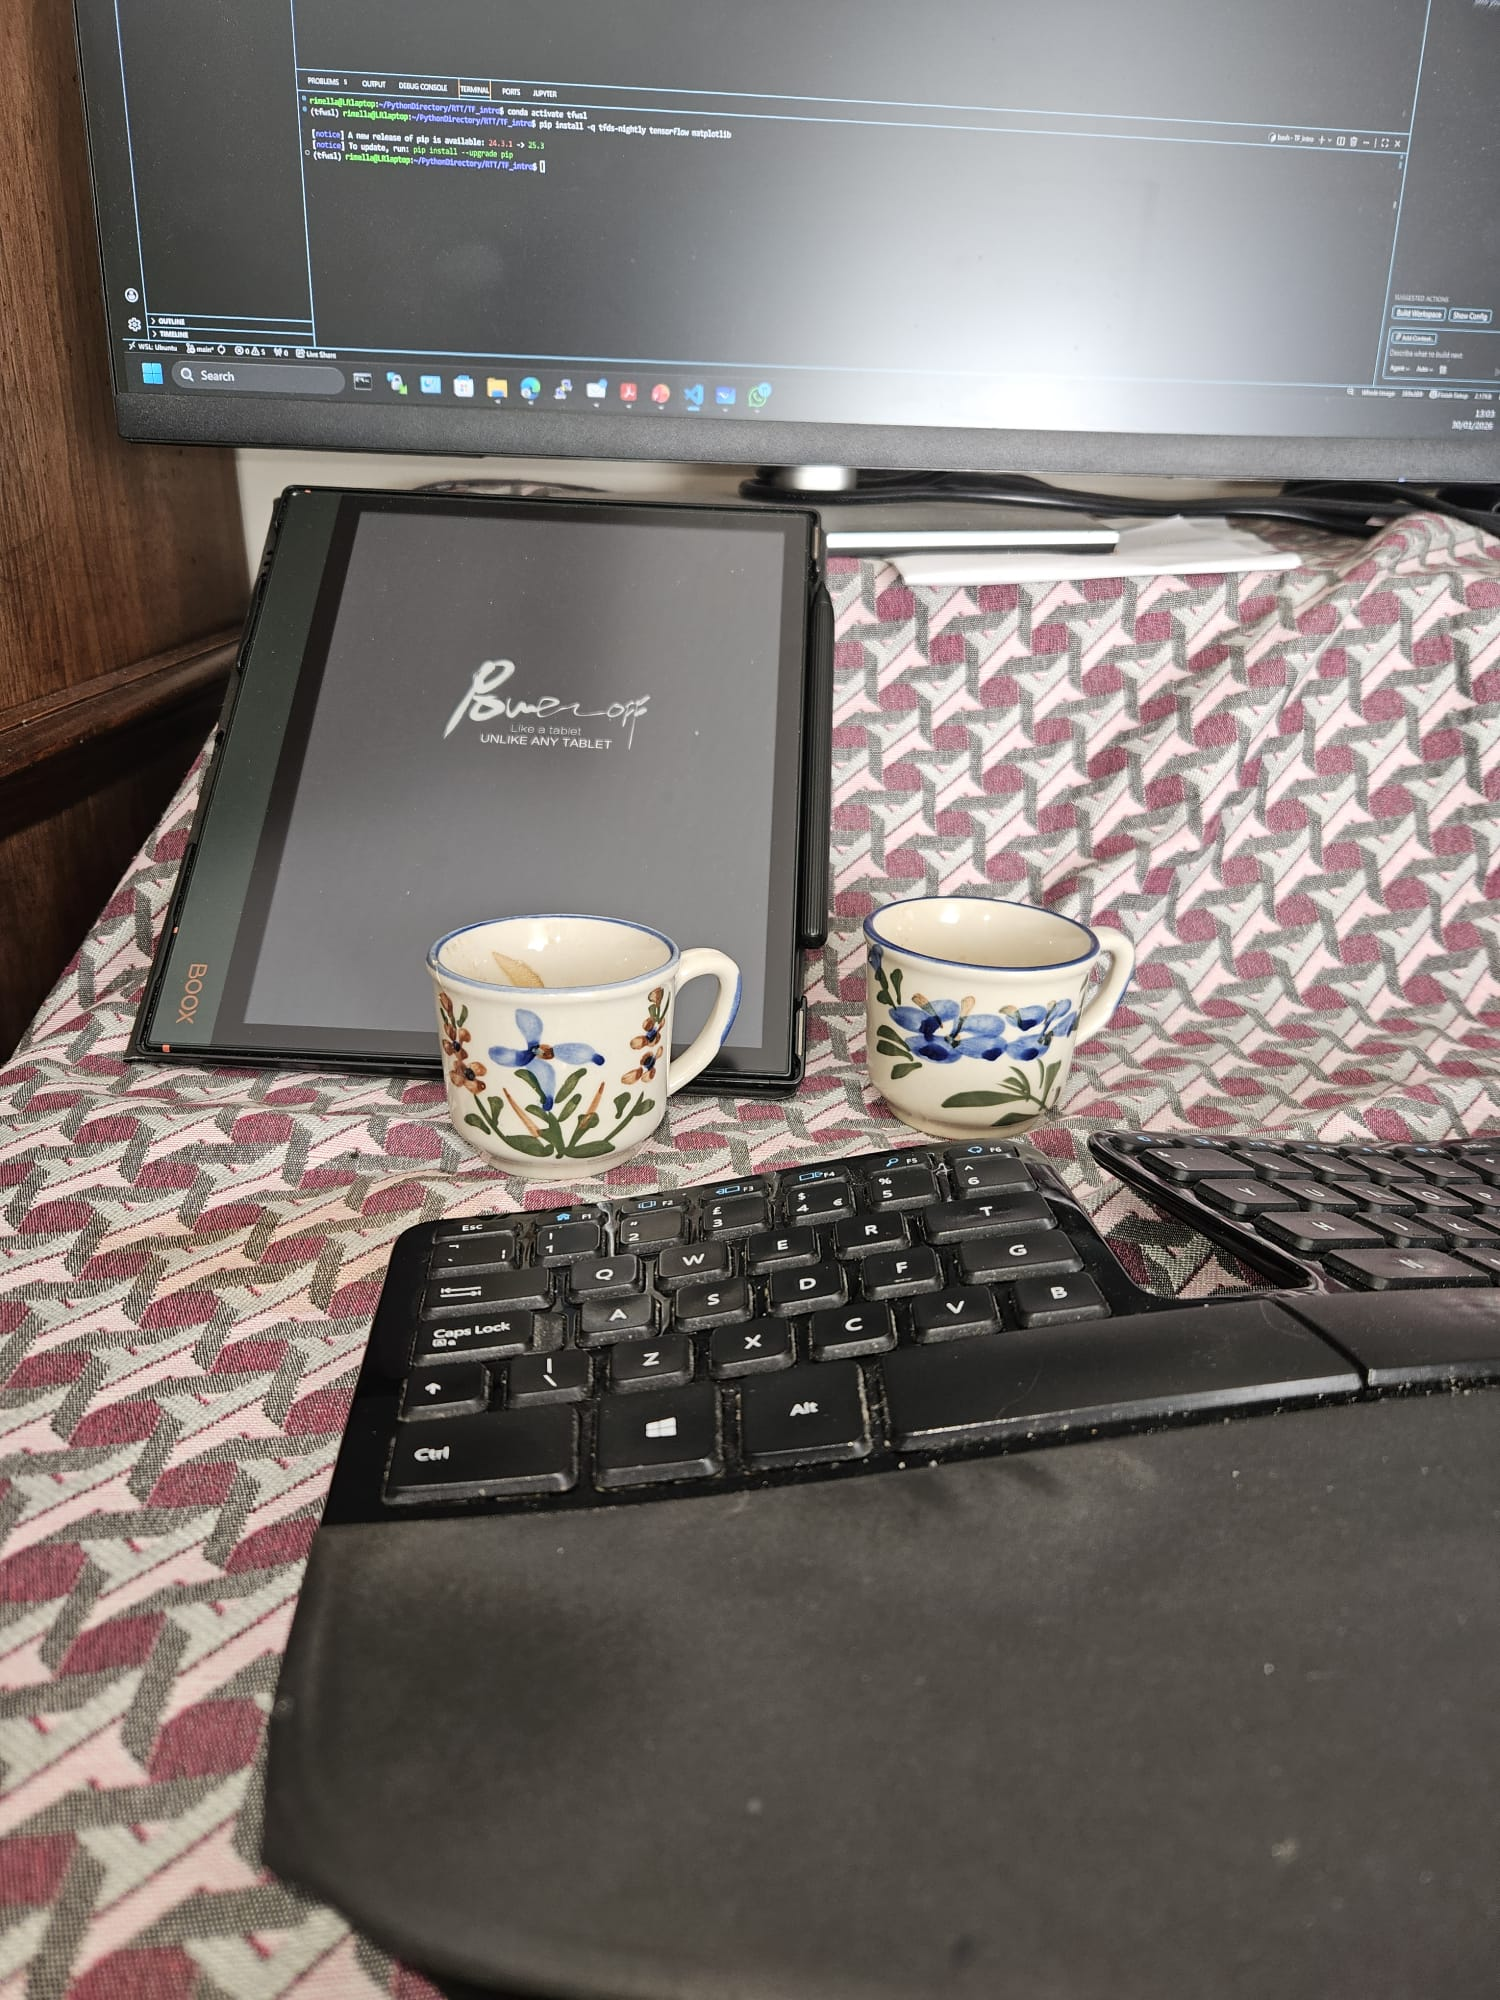

In [93]:
# Load and preprocess an image
img_path = 'images/scrivania.jpeg' # Replace with your image path
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = resnet50.preprocess_input(img_array)

display(Image(filename=img_path, width=300))

Prevediamo le 5 migliori guess con i due modelli

In [94]:
# Make predictions
predictions_res = model_resnet.predict(img_array)

# Decode and display the top predictions
decoded_predictions = resnet50.decode_predictions(predictions_res, top=5)
for i, (imagenet_id, label, score) in enumerate(decoded_predictions[0]):
	print(f"{i + 1}: {label} ({score:.2f})")

1/1 [==============================] - 1s 522ms/step
1: laptop (0.56)
2: computer_keyboard (0.15)
3: monitor (0.08)
4: notebook (0.07)
5: space_bar (0.02)


In [95]:
# Make predictions
predictions_eff = model_effnet.predict(img_array)

# Decode and display the top predictions
decoded_predictions =decode_predictions(predictions_eff, top=5)
for i, (imagenet_id, label, score) in enumerate(decoded_predictions[0]):
	print(f"{i + 1}: {label} ({score:.2f})")

1/1 [==============================] - 1s 871ms/step
1: notebook (0.21)
2: mouse (0.15)
3: laptop (0.11)
4: computer_keyboard (0.10)
5: desktop_computer (0.08)
